## Intro.
- 지금 보시는 Jupyter notebook은 창원대학교 신소재공학부 교과목인 소성가공, 유동해석, 유동해석특론과 관련하여 수치해석적인 접근법을 Python을 활용하여 보여주는 예입니다. 사용하는 문제는 Hosford/Caddell의 Metal Forming에서 Fig. 4.6에서 따왔습니다. 언급된 교재의 챕터 4-6을 살펴보시기 바랍니다.


창원대학교 신소재공학부 조교수 **정영웅**

yjeong [at] changwon.ac.kr

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 문제 설명

아래의 방정식의 '해석적'인 해를 구하기 힘들어 우리는 수치적인 해를 구하는 방법을 도입합니다.
$$ a \varepsilon_a^n \exp(-\varepsilon_a)=\varepsilon_b^n \exp(-\varepsilon_b)$$


대표적인 수치적 방법으로는 [Newton Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method) 가 꼽힙니다. 한글로 된 간단한 설명은 나무위키에서 찾을 수 있네요 - 여기를 참고하세요: [뉴튼 랩슨](https://namu.wiki/w/뉴턴-랩슨%20방법)

위의 방정식을 $f(x,y)=0$ 의 형태로 나타내면
$$a x^n \exp(-x)-y^n\exp(-y)=0$$
이고, 위에서 $a$는 상수입니다.

뉴튼랩슨 방정식을 풀기 위해 필요한 것은 위 함수의 derivative를 입니다. 위에서 독립 변수는 x, 종속 변수는 y입니다. 

주어진 독립 변수 x에 대해서 종속 변수 y값을 뉴튼랩슨 방법을 통해 얻기 위해서 $\partial f / \partial y$가 필요합니다.

$$\partial f/\partial y= -n y^{n-1}\exp(-y) +y^n \exp(-y)  $$

위에서 우리는 주어진 x 값에 대해 y 값을 찾는 작업을 할 것입니다. 따라서, 주어진 x 값 또한 주어지고, 변수는 y값 하나로 볼 수 있습니다. 

## Newton Raphson 방법의 적용

1. 위의 방정식 f(x,y)=0 를 주어진 x에 대해 풀어야 하는 문제에서 x는 상수와 같으므로, 해당 문제는 univariate, 즉 변수가 y 하나인 방정식으로 볼 수 있습니다. 따라서 실은 f(x,y)=0은 주어진 x에 대해 f(y)=0 형태로 표현이 될 수 있습니다.

2. 따라서 미지의 y값을 알기 위해서는 우선 y값으로 적절해 보이는 '초기값'을 찾아야 할 것입니다. 해당 문제에서 a, 즉 $f_0$ 값이 1일때 항상 x와 y는 같은 값입니다. 따라서 주어진 x를 y의 초기 추측값으로 사용할 수 있을 것으로 보입니다.

3. 따라서 $y_0=x$ 라는 작업후, 다음으로 $y_1$ 값을 알아보는 방식은 Newton-Raphson 방식을 따라
$$y_1 =y_0 - \frac{f(y_0)}{\partial{f}/\partial{y}}$$
여기서 물론 $\partial{f}/\partial{y}$ 값도 $y$에 대한 함수이다. $y$값으로 $y_0$를 사용하면 되겠다.

4. 다음으로 $y_3, y_4, ... y_n$ 값을 3과 동일한 형태로 반복하자 - 언제까지? $f(y_n)$ 값이 충분히 맘에 드는 만큼 작아질 때까지.

## Prerequisites

위의 작업을 순조롭게 수행하기 위해 두 방정식, 그러니까 $f(x,y)=0$ 방정식과 $\partial f/\partial y$를 Python 함수로 각각 다음과 같이 꾸며보았습니다:

In [2]:
def derive(n,x,y):
    return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
def obj(f0,n,x,y):
    return f0*(x**n)*np.exp(-x) - (y**n)*np.exp(-y)

아래에서 위 두 python 함수를 사용하여 $f_0=0.99$ 이며 $n=0.25$인 재료에 대해 x값 (0.2) 에 대한 y 값을 찾는 과정을 Newton raphson method활용하여 step-by-step basis로 나타내보겠습니다.

In [3]:
a=0.99
n=0.25
x=0.2


## 초기 스텝에서 y의 초기 값을 'guess'.
y0=x*1. ## guesses y value
df = derive(n,x,y0)
f  = obj(a,n,x,y0)
print '----------------'
print 'y0:',y0
print 'f0:',f

## 첫번째 스텝에서 y1값을 전의 y0 값, 그리고 f, df 를 활용하여 또 다시 guess
y1 = y0 - f/df
df = derive(n,x,y1)
f = obj(a,n,x,y1)
print '----------------'
print 'y1:',y1
print 'f1:',f

## 두번째 스텝; 비슷하게 진행합니다. f 값이 얼마나 줄어드는지 확인하세요.
y2=y1 - f/df
df = derive(n,x,y2)
f = obj(a,n,x,y2)
print '----------------'
print 'y2:',y2
print 'f2:', f


## 세번째 스텝; f 값이 얼마나 줄어드는지 확인하세요 - 이미 매우 작은 값일 겁니다.
y3=y2 - f/df
df = derive(n,x,y3)
f = obj(a,n,x,y3)
print '----------------'
print 'y3:',y3
print 'f3:', f


----------------
y0: 0.2
f0: -0.00547518253507
----------------
y1: 0.16
f1: 0.00310001755206
----------------
y2: 0.170225834213
f2: 0.000256511034942
----------------
y3: 0.171236112515
f3: 2.31643551873e-06


- 위의 스텝들을 계속해서 반복할 필요가 있습니다.
- 하지만 위처럼 비슷하거나, 똑같은 명령을 여러번 적기 보다는 좀 더 멋지고 간략하게 나타낼 수 있는 방법이 필요할 것 같습니다.

- 아래에 위의 방법을 좀 더 fancy 하게 수행하는 함수를 적어보았습니다.

In [4]:
def newton_raphson(f0,n,x):
    ## guesses y value.
    y=x*1. 
    ## 차후에 초기 값 y를 더 알맞은 방식으로 설정해야 할 필요가 있습니다.
    ## 이와 관련된 내용은 현 jupyter notebook의 마지막 cell을 참고해주세요.
    

    ## tolerance는 f의 절대값이 tolerance보다 작은 값일 때 '반복'되는
    ## loop를 빠져나오는 기준이 됩니다 (사용자의 목적에 맞게 조정하면 되겠습니다.)
    tol=1e-10  
    
    f=obj(f0,n,x,y)
    it=0
    while (abs(f)>tol):
        it=it+1
        df = derive(n,x,y)
        f  = obj(f0,n,x,y)
        y = y - f/df
    
    return y

## TEST

In [5]:
## test
%time ## 아래의 함수를 수행하는데 걸린 시간을 측정해주는 명령입니다.
y=newton_raphson(0.99,0.25,0.20) ## newton_raphson 함수의 실행
print '-------------------------------'
print '최종적으로 얻어진 수치해석 결과 값:', y

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.06 µs
-------------------------------
최종적으로 얻어진 수치해석 결과 값: 0.171245404167


- 위를 살펴보면 해당 수치해석을 하는데 약 5~10 micro second, 그러니까 10^-5 초 정도가 걸리는 것을 알 수 있습니다 - 매우 빠르죠? 물론 여러분들의 컴퓨터의 성능에 따라 다른 시간이 걸릴 겁니다.

- 아래는 주어진 n 값에 대해, 다양한 $f_0$ 값들에 경우에 $\varepsilon_a$ 와 $\varepsilon_b$가 어떠한 관계를 가지고 있는지를 찾아 보는 방법입니다.
- 위의 newton_raphon 함수를 사용하여 xy_curve, 즉 x vs. y 곡선을 찾아주는 함수를 사용했습니다.

In [6]:
def xy_curve(n=0.25,f0=0.999):
    x=np.linspace(0.00,n,100)
    y=[]
    for i in xrange(len(x)):
        y.append(newton_raphson(f0,n,x[i]))
    y=np.array(y)
    return x,y

## TEST  for obtaining actual graphs

위 XY 함수를 사용해서 n=0.25 일때 $f_0=0.9, 0.95, 0.99, 0.995, 0.999, 1$ 값에 대해 각각 어떤 $\varepsilon_a$ vs. $\varepsilon_b$ 곡선이 나타나는지 그래프로 옮겨보겠습니다.

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


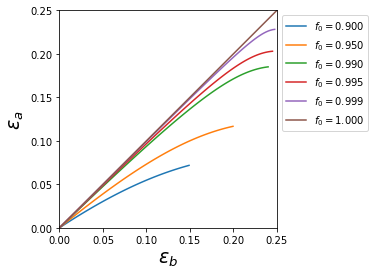

In [7]:
n=0.25
fs=[0.9,0.95,0.99,0.995,0.999,1.]
fs=np.array(fs)

ax=gca() ## 그래프가 그려질 axes object를 ax에 저장.
for i in xrange(len(fs)):
    ## xy_curve함수에서 얻어진 그래프를 x,y 변수에 저장 그립니다.
    x,y=xy_curve(n,fs[i])
    ## 위 x, y값을 ax에 포함된 plot함수를 사용하여 그립니다. 
    ## label argument를 추후에 레전드를 꾸미기 위해서 지정해줍니다.
    ax.plot(x,y,'-',label=r'$f_0=%.3f$'%fs[i])


## 아래는 그래프를 '꾸며'주는 명령어들입니다.
ax.set_ylim(0.,n)
ax.set_xlim(0.,n)
ax.set_xlabel(r'$\varepsilon_b$',fontsize=19)
ax.set_ylabel(r'$\varepsilon_a$',fontsize=19)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1,1.))

## For advanced students.

- 위의 newton_raphson Python 함수를 사용했을 때, $f_0$ 값이 낮을 수록, 수렴된 값을 끝까지 찾지 못했습니다. 그리고 RuntimeWarning 메시지도 보이네요. 아마도 해당 방법으로 approximate한 해를 찾는 과정에서 minor한 문제가 있나 봅니다.
- 위의 문제를 해결하기 위해서는 초기값을 설정하는 방식을 개선 시킬 필요가 있습니다. 위에 주어진 script를 활용하여 이를 해결해 보세요.